In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [4]:
from scipy import integrate
import warnings

# 積分に関する warining を出力しないようにする
warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)

In [6]:
# 確率変数の取りうる値を定義
x_range = np.array([0, 1])
x_range

array([0, 1])

In [7]:
# 確率密度関数の定義
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [8]:
# 確率変数の定義
X = [x_range, f]

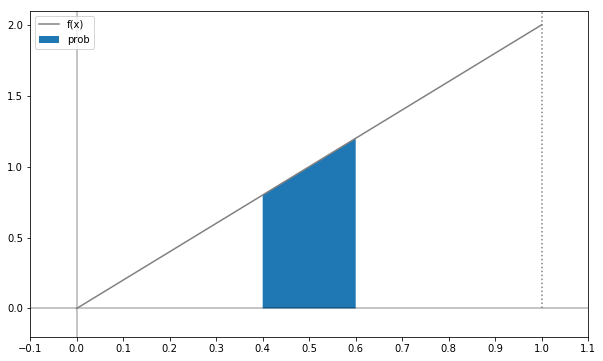

In [11]:
# 確率密度函数を描画する

xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

xs = np.linspace(0.4, 0.6, 100)
ax.fill_between(xs, [f(x) for x in xs], label='prob')
ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [12]:
# 積分値
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [13]:
# 確率密度関数の最小値を確認
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
res.fun

0

In [14]:
# 確率密度関数の積分値が1であることを確認
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [15]:
# 累積分布関数
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [16]:
# いかさまルーレットが0.4から0.6の間を取る確率
F(0.6) - F(0.4)

0.200

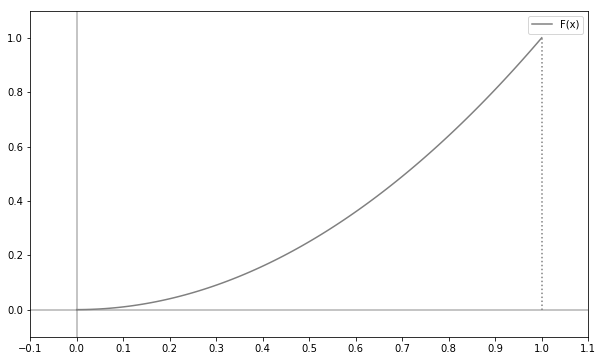

In [18]:
# 累積分布関数を描画する
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [19]:
# 確率変数の変換(2X+3)
y_range = [3, 5]

# 確率密度関数
def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0

# 累積分布関数    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

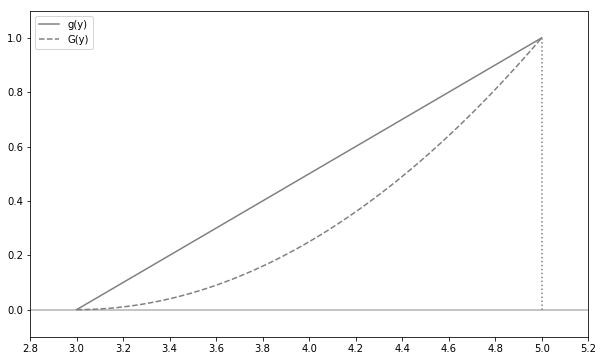

In [20]:
# 確率密度関数と累積分布関数を描画
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys], label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys], label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [21]:
# 期待値
def integrand(x):
    return x * f(x)

# いかさまルーレットの期待値
integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [22]:
def E(X, g=lambda x : x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [23]:
E(X)

0.667

In [24]:
E(X, g=lambda x: 2 * x + 3)

4.333

In [25]:
# E(2X+3) = 2E(X) + 3
2 * E(X) + 3

4.333

In [26]:
# 分散
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

# いかさまルーレットの分散
integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [27]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [28]:
V(X)

0.056

In [29]:
V(X, lambda x: 2 * x + 3)

0.222

In [30]:
# V(2X+3) = 4V(X)
2 ** 2 * V(X)

0.222